In [1]:

import aifc
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# In this file, I say "recording sample WAV file, over" twice (not necessarily true!)
recording_wav = aifc.open('sample_recordingwav.aif', 'rb')

In [3]:

# In this file, I say "recording AIFF file, over" twice (true!)
recording_aiff = aifc.open('sample_recordingaiff.aif', 'rb')

In [4]:

# Function to process each sound file
def process_file(sound_file):
    sound_wave =  sound_file.readframes(-1)
    frame_rate = sound_file.getframerate()
    sound_signal = np.frombuffer(sound_wave, dtype=np.int16)
    signal_length = sound_signal.size
    time_stamps_wave = np.linspace(start=0, stop=signal_length/frame_rate, num=signal_length)
    return time_stamps_wave, sound_signal

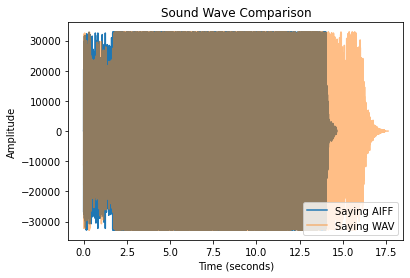

In [5]:

# Call function to process the recordings and plot their sound waves
recordings = [recording_aiff, recording_wav]
names = ['Saying AIFF', 'Saying WAV']

for i, rec in enumerate(recordings):
    rec_time, rec_sig = process_file(rec)
    if i > 0:
        plt.plot(rec_time, rec_sig, alpha=0.5, label=names[i])
    elif i == 0:
        plt.plot(rec_time, rec_sig, label=names[i])
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Sound Wave Comparison')
plt.legend()
plt.show()